In [4]:
!pip install pandas

In [6]:
import pandas as pd
import sklearn

In [7]:
df_train = pd.read_csv("../data/processed/clean_train.csv")

In [8]:
df_test = pd.read_csv("../data/processed/clean_test.csv")

In [9]:
X_train= df_train.drop(['y'], axis=1) 
y_train= df_train['y'] 
X_test= df_test.drop(['y'], axis=1)
y_test= df_test['y']

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [11]:
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9065307113377034

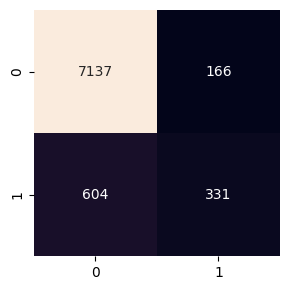

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

long_deposit = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(long_deposit)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

tenemos 7137 verdaderos positivos, 331 verdaderos negativos, 604 falsos negativos y 166 falsos positivos 

Vamos a optimizar este modelo creando un pipeline incial, debido a que ya esta escalado el modelo solo vamos a insertar el modelo matematico en el pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [17]:
pipe = Pipeline([
    ('model', LogisticRegression())   
])

pipe.get_params()

{'memory': None,
 'steps': [('model', LogisticRegression())],
 'verbose': False,
 'model': LogisticRegression(),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'deprecated',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [25]:

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'max_iter': [100, 200, 300, 400, 500],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-3, 1e-2]
}


grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 4)
grid

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [28]:
grid.fit(X_train, y_train)
result = pd.DataFrame(grid.cv_results_)

c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_rati

In [37]:

result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       4200 non-null   float64
 1   std_fit_time        4200 non-null   float64
 2   mean_score_time     4200 non-null   float64
 3   std_score_time      4200 non-null   float64
 4   param_C             4200 non-null   float64
 5   param_class_weight  2100 non-null   object 
 6   param_max_iter      4200 non-null   int32  
 7   param_penalty       3150 non-null   object 
 8   param_solver        4200 non-null   object 
 9   param_tol           4200 non-null   float64
 10  params              4200 non-null   object 
 11  split0_test_score   2310 non-null   float64
 12  split1_test_score   2310 non-null   float64
 13  split2_test_score   2310 non-null   float64
 14  split3_test_score   2310 non-null   float64
 15  split4_test_score   2310 non-null   float64
 16  split5

In [42]:
result.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,param_tol,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001536,0.000465,0.000000,0.000000,0.001,None,100,l1,newton-cg,0.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311
1,0.001695,0.000634,0.000000,0.000000,0.001,None,100,l1,newton-cg,0.0010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311
2,0.001388,0.000477,0.000000,0.000000,0.001,None,100,l1,newton-cg,0.0100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311
3,0.001073,0.000249,0.000000,0.000000,0.001,None,100,l1,lbfgs,0.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311
4,0.000860,0.000338,0.000000,0.000000,0.001,None,100,l1,lbfgs,0.0010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311
5,0.001067,0.000250,0.000000,0.000000,0.001,None,100,l1,lbfgs,0.0100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311
6,0.026228,0.003283,0.001619,0.000526,0.001,None,100,l1,liblinear,0.0001,...,0.887574,0.887574,0.887523,0.887523,0.887523,0.887523,0.887523,0.887557,0.000024,1046
7,0.021989,0.002677,0.001364,0.000422,0.001,None,100,l1,liblinear,0.0010,...,0.887574,0.887574,0.887523,0.887523,0.887523,0.887523,0.887523,0.887557,0.000024,1046
8,0.019322,0.002484,0.001989,0.000568,0.001,None,100,l1,liblinear,0.0100,...,0.887574,0.887574,0.887523,0.887523,0.887523,0.887523,0.887523,0.887557,0.000024,1046
9,0.001016,0.000061,0.000000,0.000000,0.001,None,100,l1,sag,0.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311


In [36]:
result['rank_test_score'].sort_values(ascending=True).head(20)

56       1
2666     2
2639     3
716      4
776      5
1856     6
839      7
3236     8
1946     9
2414    10
3749    11
1859    12
719     13
3149    13
1439    15
1496    16
2099    17
1994    18
1979    19
3116    20
Name: rank_test_score, dtype: int32

In [38]:
best_iter = result.loc[result['rank_test_score'] == 1]
best_iter

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,param_tol,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
56,0.030207,0.004381,0.001569,0.000475,0.001,None,100,None,sag,0.01,...,0.902594,0.903505,0.908925,0.905282,0.909836,0.904827,0.911202,0.907132,0.002499,1


In [39]:

print(best_iter.to_string())


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C param_class_weight  param_max_iter param_penalty param_solver  param_tol                                                                                              params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  split10_test_score  split11_test_score  split12_test_score  split13_test_score  split14_test_score  mean_test_score  std_test_score  rank_test_score
56       0.030207      0.004381         0.001569        0.000475    0.001               None             100          None          sag       0.01  {'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': None, 'solver': 'sag', 'tol': 0.01}           0.909877           0.907601           0.907146           0.908512            0.90487           0.908056           0.905325           0.909422           0.90

In [40]:
model_grid_search = LogisticRegression(C=0.001, class_weight= None, max_iter= 100, penalty= None, solver= 'sag', tol= 0.01)



In [41]:
model_grid_search.fit(X_train, y_train)
y_pred_grid = model_grid_search.predict(X_test)

model_grid_search_accuracy = accuracy_score(y_test, y_pred_grid)
model_grid_search_accuracy

c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.9050740470988103

En conclusion tendremos una eficiecia en las predicciones que rodea el 90%, sin embargo al hacer la optimizacion podemos llegar al  91.1202 % en la particion 14 del grid search. 